In [1]:
from loader import *
import os
import matplotlib.pyplot as plt

def train(net, loss_fn, train_file, batch_size, optimizer, load_file, save_path, epoch_num=1, retrain=False):
    X, Y = load_fashion(train_file, kind="train")
    # X, Y = load_MNIST(train_file, transform=True)
    data_size = X.shape[0]
    # 划分训练集和验证集
    split_index = int(data_size * 0.9)
    X_train, Y_train = X[:split_index], Y[:split_index]
    X_val, Y_val = X[split_index:], Y[split_index:]
    if not retrain and os.path.isfile(load_file): load(net.parameters, load_file)

    val_accuracies = []
    train_losses = []
    val_losses = []
    for epoch in range(epoch_num):
        i = 0
        while i <= split_index - batch_size:
            x = X_train[i:i+batch_size]
            y = Y_train[i:i+batch_size]
            i += batch_size

            output = net.forward(x)
            batch_acc, batch_loss = loss_fn(output, y)
            eta = loss_fn.gradient()
            net.backward(eta)
            #实现学习率下降
            optimizer.update(epoch)

            if i % (batch_size * 100) == 0:
                print("epoch: %d, batch: %5d, batch acc: %2.2f, batch loss: %.2f" % \
                    (epoch + 1, i, batch_acc*100, batch_loss))
            
        _, train_loss = loss_fn(net.forward(X_train), Y_train)
        _, val_loss = loss_fn(net.forward(X_val), Y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_acc = evaluate(net, X_val, Y_val)
        val_accuracies.append(val_acc)
        print("epoch: %d, training loss: %.3f, validation loss: %.3f, validation accuracy: %.3f" % \
            (epoch + 1, train_loss, val_loss, val_acc))
        
    if save_path is not None: save(net.parameters, save_path)

    plt.plot(range(1, epoch_num + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epoch_num + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()
    
    plt.plot(range(1, epoch_num + 1), val_accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy vs. Epoch')
    plt.show()

def test(net, load_file, test_file):
    X_test, Y_test = load_fashion(test_file, kind="t10k")
    if os.path.isfile(load_file):load(net.parameters, load_file)
    accuracy, acc_labels = evaluate(net, X_test, Y_test, istest=True)
    return accuracy, acc_labels

def evaluate(net, X, Y, istest=False):
    output = net.forward(X)
    pred = np.argmax(output, axis=1)
    Y = np.argmax(Y, axis=1)
    correct = np.sum(pred == Y)
    accuracy = correct / len(Y)
    if istest == True:
        corr_labels = [0] *10
        tot_labels = [0] *10
        acc_labels = []
        for i in range(len(Y)):
            tot_labels[Y[i]] += 1
            if Y[i] == pred[i]:
                corr_labels[Y[i]] += 1
        for i in range(10):
            acc_labels.append(corr_labels[i]/tot_labels[i])
        return accuracy, acc_labels

    return accuracy

### Training

In [2]:
from Loss import *
from net import *
from optim import *
from layers import *

if __name__ == "__main__": 
    # layers = [
    #     {'type': 'batchnorm', 'shape': 784, 'requires_grad': False, 'affine': False},
    #     {'type': 'linear', 'shape': (784, 400)},
    #     {'type': 'batchnorm', 'shape': 400},
    #     {'type': 'relu'},
    #     {'type': 'linear', 'shape': (400, 100)},
    #     {'type': 'batchnorm', 'shape': 100},
    #     {'type': 'relu'},
    #     {'type': 'linear', 'shape': (100, 10)}
    # ]
    # 可自定义隐藏层大小，激活函数类型, 正则化强度
    hidden_size = 256
    norm_strength = 0.1
    layers = [
        # {'type': 'batchnorm', 'shape': 784, 'requires_grad': False, 'affine': False},
        {'type': 'linear', 'shape': (784, hidden_size), 'lambda_reg': norm_strength},
        # {'type': 'batchnorm', 'shape': hidden_size},
        {'type': 'leakyrelu'},
        {'type': 'linear', 'shape': (hidden_size, 10)}
    ]
    loss_fn = CrossEntropyLoss()
    net = Net(layers)
    lr = 0.001
    batch_size = 64
    optimizer = SGD(net.parameters, lr)
    # train_file = 'MNIST/trainset.npz'
    # param_file = 'MNIST/param.npz'
    train_file = 'FASHION'
    param_file = 'FASHION/param.npz'
    train(net, loss_fn, train_file, batch_size, optimizer, None, param_file, epoch_num=200, retrain=True)

e:\计算机视觉\Assg1\Loss.py:26: RuntimeWarning: divide by zero encountered in log
  loss = -1 * np.einsum('ij,ij->', y, np.log(a), optimize=True) / y.shape[0]


epoch: 1, batch:  6400, batch acc: 73.44, batch loss: nan
epoch: 1, batch: 12800, batch acc: 71.88, batch loss: nan
epoch: 1, batch: 19200, batch acc: 78.12, batch loss: nan
epoch: 1, batch: 25600, batch acc: 75.00, batch loss: nan
epoch: 1, batch: 32000, batch acc: 87.50, batch loss: nan
epoch: 1, batch: 38400, batch acc: 81.25, batch loss: nan
epoch: 1, batch: 44800, batch acc: 73.44, batch loss: nan
epoch: 1, batch: 51200, batch acc: 71.88, batch loss: 5.51
epoch: 1, training loss: nan, validation loss: nan, validation accuracy: 0.808


KeyboardInterrupt: 

### Testing

In [ ]:
param_file = 'FASHION/param.npz'
test_file = 'FASHION'
acc, acc_label = test(net, param_file, test_file)
print("Test accuracy is: %2.3f"%acc)
for i in range(10):
    print("Accuracy for label %d: %.3f"%(i+1, acc_label[i]))

Test accuracy is: 0.884
Accuracy for label 1: 0.842
Accuracy for label 2: 0.967
Accuracy for label 3: 0.803
Accuracy for label 4: 0.891
Accuracy for label 5: 0.827
Accuracy for label 6: 0.958
Accuracy for label 7: 0.683
Accuracy for label 8: 0.954
Accuracy for label 9: 0.965
Accuracy for label 10: 0.952


### Visualizing

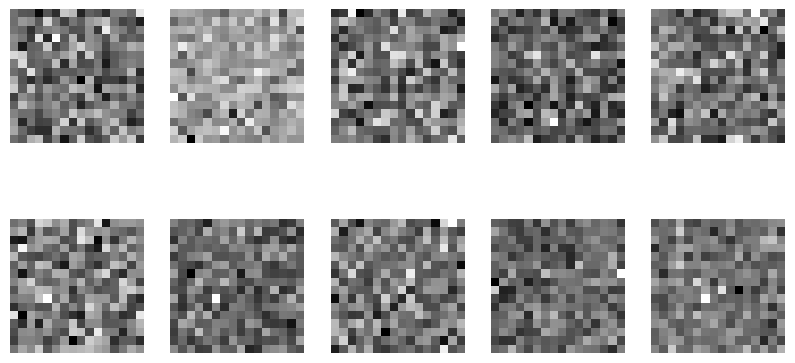

In [ ]:
import matplotlib.pyplot as plt

def visualize_weights(weights):
    plt.figure(figsize=(10, 5))
    for i in range(weights.shape[1]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(weights[:, i].reshape(16, 16), cmap='gray')
        plt.axis('off')
    plt.show()

# 加载训练好的模型参数
param_file = 'FASHION/param.npz'
load(net.parameters, param_file)

# 获取线性层的权重
linear_weights = net.layers[2].W.data

# 可视化权重
visualize_weights(linear_weights)
